In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from math import sqrt
from collections import Counter
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
from sklearn.cross_validation import train_test_split
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df = pd.read_csv('basketball_teams.csv')
#df

In [7]:
dfNBA = df[df.lgID == 'NBA']#Using Only NBA information for our data
dfNBA = dfNBA[dfNBA.games == 82]#Using Only NBA seasons that played the full 82 games.
dfNBA = dfNBA[df.o_fgm != 0]#Removing rows where there are no stats for certain categories.


In [8]:
df = dfNBA[df.d_fgm != 0]

In [9]:
playoff = pd.DataFrame()
df1 = playoff
df['playoff'] = df['playoff'].astype(str)

In [10]:
df['Playoff'] = df.playoff.apply(lambda x: 0 if x =='nan'  else 1 ) #Converting playoff column to binary 1 made playoff.

In [11]:
playoff['o_fga'] = df['o_fga'].tolist()
playoff['o_fgm'] = df['o_fgm'].tolist()
playoff['o_asts'] =df['o_asts'].tolist()
playoff['d_fgm'] = df['d_fgm'].tolist()
playoff['Playoff'] =df['Playoff'].tolist()
playoff['wins'] =df['won'].tolist()#Converting the columns we are going to be using to lists.
playoff['total_fg'] = playoff['o_fgm']-playoff['d_fgm'] #Creating new variable for fgs made - fgs allowed.

### Logisitc Regression using SKLearn and Stat Models

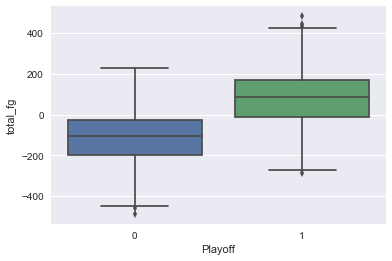

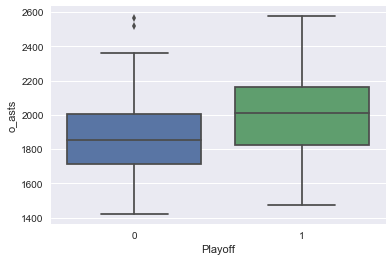

In [25]:
#Using two features of "totalfgs" and "o_asts" to predict playoff entries.
sns.boxplot(x="Playoff", y="total_fg", data=playoff)
plt.show()

sns.boxplot(x="Playoff", y="o_asts", data=playoff)
plt.show()

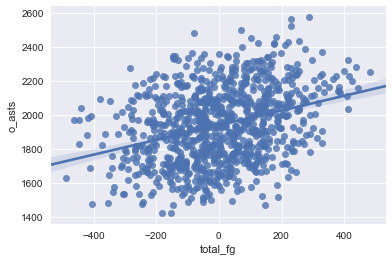

In [16]:
sns.regplot(x='total_fg', y='o_asts', data=playoff)
plt.show()

In [21]:
X_statsmod = playoff[['total_fg', 'o_asts']]
X_statsmod['intercept'] = 1 
logit = sm.Logit(playoff['Playoff'], X_statsmod)
result = logit.fit()
print(result.summary())

C:\Users\Connor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.464409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Playoff   No. Observations:                  945
Model:                          Logit   Df Residuals:                      942
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Jan 2018   Pseudo R-squ.:                  0.3214
Time:                        16:05:42   Log-Likelihood:                -438.87
converged:                       True   LL-Null:                       -646.73
                                        LLR p-value:                 5.306e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_fg       0.0108      0.001     14.066      0.000       0.009       0.012
o_asts         0.0018      0.

In [23]:

pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(playoff['Playoff'], pred_y_statsmod)

print('\n Accuracy by Playoff status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by Playoff status
col_0      0    1
Playoff          
0        294  116
1        100  435

 Percentage accuracy
0.771428571429


In [37]:
lr = LogisticRegression(C=1e9)
y = playoff['Playoff']
X = playoff[['total_fg', 'o_asts']]
X_train, X_test, Y_train, Y_test =train_test_split(X, y)
fit = lr.fit(X_train, Y_train)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Percentage accuracy with two features')
print(lr.score(X_test, Y_test))

Coefficients
[[ 0.01092644  0.0002397 ]]
[ -1.10114500e-05]

 Accuracy by admission status
Playoff   0    1
row_0           
0        77   24
1        28  108

 Percentage accuracy with two features
0.7805907173


In [38]:
lr = LogisticRegression(C=1e9)
y = playoff['Playoff']
X = playoff.drop(['Playoff'], axis=1)
X_train, X_test, Y_train, Y_test =train_test_split(X, y)
fit = lr.fit(X_train, Y_train)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y_test))

print('\n Percentage accuracy with all original features')
print(lr.score(X_test, Y_test))

Coefficients
[[ -1.19517810e-03  -7.27206889e-05  -4.81296740e-04  -8.13408893e-04
   -5.51082885e-06   7.40688204e-04   1.46022420e-05   9.81271842e-05
    9.76417989e-07]]
[ -4.99564390e-07]

 Accuracy by admission status
Playoff   0    1
row_0           
0        91    3
1        13  130

 Percentage accuracy with all original features
0.932489451477


Using all the features in the Playoff data set seems to be the best predictor of whether a team makes the playoff than just two features by a large margain. Next we will look at Lasso and Ridge Regression.

By using these two features and a logisitical regression we have about 77% accuracy in predicting whether or not a team makes the playoffs. Next we will look at lasso and ridge regression.

### Ridge Regression

In [40]:
y = playoff['Playoff']
X = playoff[['total_fg', 'o_asts']]
X_train, X_test, Y_train, Y_test =train_test_split(X, y)

regr1.fit(X_train, Y_train)
print('\nR-squared simple model with two features:')
print(regr1.score(X_test, Y_test))


R-squared simple model with two features:
0.308881253201


In [41]:
regr2 = linear_model.LinearRegression()
# Y_train = playoff['Playoff']
# X_train = playoff.loc[:, ~(playoff.columns).isin(['Playoff'])]

In [43]:
y = playoff['Playoff']
X = X_train = playoff.loc[:, ~(playoff.columns).isin(['Playoff'])]
X_train, X_test, Y_train, Y_test =train_test_split(X, y)

In [44]:
regr2.fit(X_train, Y_train)
print('\nR-squared simple model with all original features:')
print(regr2.score(X_test, Y_test))


R-squared simple model with all original features:
0.727895735855


In [45]:
playoff2= playoff.copy()

In [46]:
playoff2['wins2'] = (playoff2['wins']) **2
playoff2['wins3'] = (playoff2['wins']) **3
playoff2['o_asts_d_fgm'] = playoff2['o_asts']* playoff['d_fgm']
#Here we are creating new features to see if it improves our model.

In [47]:
regrBig = linear_model.LogisticRegression()  
y = playoff2['Playoff']
X = playoff2.drop(['Playoff'], axis=1)
X_train, X_test, Y_train, Y_test =train_test_split(X, y)
#X_train2 = playoff.loc[:, ~(playoff.columns).isin(['Playoff'])]
regrBig.fit(X_train, Y_train)
print('\nR-squared complex model with all features plus transformed ones:')
print(regrBig.score(X_train, Y_train))


R-squared complex model with all features plus transformed ones:
0.911016949153


Using Ridge regression we see that increasing features which are correlated with playoff birth such as squaring and cubing wins makes our model more accurate than simply just using all of our columns in the playoff data set. 

### Lasso Regression

In [48]:
lass = linear_model.Lasso(alpha=.35)
y = playoff['Playoff']
X = playoff[['total_fg', 'o_asts']]
X_train, X_test, Y_train, Y_test =train_test_split(X, y)

lass.fit(X_train, Y_train)
print('\nR-squared simple model with two features:')
print(lass.score(X_test, Y_test))


R-squared simple model with two features:
0.289435753715


In [49]:
lass2 = linear_model.Lasso(alpha=.35)
y = playoff['Playoff']
X = X_train = playoff.loc[:, ~(playoff.columns).isin(['Playoff'])]
X_train, X_test, Y_train, Y_test =train_test_split(X, y)

lass2.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass2.score(X_train, Y_train))
origparams = np.append(lass2.coef_, lass2.intercept_)
print('\nParameter estimates for the model with all original features:')
print(origparams)

R² for the model with few features:
0.652212556522

Parameter estimates for the model with all original features:
[  5.01386836e-05  -2.98215391e-04   0.00000000e+00  -1.61194372e-04
  -0.00000000e+00   0.00000000e+00   1.22008601e-03  -1.27803916e-05
   9.05247499e-08   1.64680271e-02]


In [50]:
lassBig = linear_model.Lasso(alpha=.35)

y = playoff2['Playoff']
X = playoff2.drop(['Playoff'], axis=1)
X_train, X_test, Y_train, Y_test =train_test_split(X, y)

lassBig.fit(X_train, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with all features plus transformed ones:')
print(origparams)


R² for the model with many features:
0.653285575223

Parameter estimates for the model with all features plus transformed ones:
[  7.59936578e-06  -1.23567538e-04   0.00000000e+00  -1.57021868e-04
  -0.00000000e+00  -0.00000000e+00   1.20746244e-03  -1.27652839e-05
   7.13878334e-08  -1.05844665e-01]


### AlphaTest

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':np.linspace(0, 1, num=10) }

lassBig = linear_model.Lasso(alpha=.35)

clf = GridSearchCV(lassBig, parameters, cv=5)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

print (clf.best_estimator_)
print (clf.best_params_ )

C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.0}


C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Summary
Looking at our data it seems that alpha of 0.0 makes for the most accurate model. Also our Ridge model using all the features and their correlated features was our most accurate model for prediciting playoff births. This is because lasso regression zeros out many features and  is better suited for more features with many zeros values.